## ERA5 Monthly Averaged Data Analysis 

In [1]:
#%matplotlib inline 
# this line is required for the plots to appear in the Jupyter cells, rather than launching the matplotlib GUI
%matplotlib notebook
#this allows interactive view but you need to be in classic rather than CoCalc Jupyter notebook for this to work

import matplotlib

import numpy as np

import matplotlib.pyplot as plt


# Let printing work the same in Python 2 and 3
from __future__ import division,print_function

# notice two underscores _ either side of future

import xarray as xr
import netCDF4 as nc

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


First I tried to download 1 year of data for just temperature to test data out. Dowloaded from following link: https://cds.climate.copernicus.eu/datasets/reanalysis-era5-land-monthly-means?tab=overview


Sub-region extraction for UK:

North - 61 degrees

West - 8 degrees

South - 49 degrees

East - 2 degrees

In [3]:
data = xr.open_dataset(r"/Users/anvijoy/Desktop/Anvi/Uni Notes/Internal Placement/data_stream-moda.nc")

In [5]:
# Prints all the variables listed in the .nc file
print(data.data_vars)

Data variables:
    d2m      (valid_time, latitude, longitude) float32 587kB ...
    t2m      (valid_time, latitude, longitude) float32 587kB ...
    skt      (valid_time, latitude, longitude) float32 587kB ...
    stl1     (valid_time, latitude, longitude) float32 587kB ...
    stl2     (valid_time, latitude, longitude) float32 587kB ...
    stl3     (valid_time, latitude, longitude) float32 587kB ...
    stl4     (valid_time, latitude, longitude) float32 587kB ...


In [7]:
# Prints all the dimensions listed in the .nc file
print(data.dims)

FrozenMappingWarningOnValuesAccess({'valid_time': 12, 'latitude': 121, 'longitude': 101})


In [9]:
# Prints all the attributes listed in the .nc file
print(data.attrs)

{'GRIB_centre': 'ecmf', 'GRIB_centreDescription': 'European Centre for Medium-Range Weather Forecasts', 'GRIB_subCentre': 0, 'Conventions': 'CF-1.7', 'institution': 'European Centre for Medium-Range Weather Forecasts', 'history': '2025-06-30T18:16 GRIB to CDM+CF via cfgrib-0.9.15.0/ecCodes-2.41.0 with {"source": "data.grib", "filter_by_keys": {"stream": ["moda"]}, "encode_cf": ["parameter", "time", "geography", "vertical"]}'}


In [10]:
# Prints the data of the variable
print(data.d2m)

<xarray.DataArray 'd2m' (valid_time: 12, latitude: 121, longitude: 101)> Size: 587kB
[146652 values with dtype=float32]
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 96B 2024-01-01 ... 2024-12-01
  * latitude    (latitude) float64 968B 61.0 60.9 60.8 60.7 ... 49.2 49.1 49.0
  * longitude   (longitude) float64 808B -8.0 -7.9 -7.8 -7.7 ... 1.7 1.8 1.9 2.0
    expver      (valid_time) <U4 192B ...
Attributes: (12/31)
    GRIB_paramId:                             168
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      12221
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_gridType:                            regular_ll
    ...                                       ...
    GRIB_totalNumber:                         0
    GRIB_units:                               K
    long_name:                                2 metre dewpoint temperature
    units: 

In [11]:
# Variables can be converted to numpy arrays
data_one_year = data.d2m.values
data_all_months = data.d2m.values

# Print the shape of the numpy array
print(data_one_year.shape)
print(data_all_months.shape)

(12, 121, 101)
(12, 121, 101)


In [13]:
print(data_one_year)

[[[      nan       nan       nan ...       nan       nan       nan]
  [      nan       nan       nan ...       nan       nan       nan]
  [      nan       nan       nan ...       nan       nan       nan]
  ...
  [      nan       nan       nan ... 274.22656 274.18555 274.14453]
  [      nan       nan       nan ... 274.33203 274.32422 274.32227]
  [      nan       nan       nan ... 274.45898 274.47266 274.50586]]

 [[      nan       nan       nan ...       nan       nan       nan]
  [      nan       nan       nan ...       nan       nan       nan]
  [      nan       nan       nan ...       nan       nan       nan]
  ...
  [      nan       nan       nan ... 279.47974 279.43677 279.386  ]
  [      nan       nan       nan ... 279.5227  279.5188  279.52466]
  [      nan       nan       nan ... 279.5852  279.60474 279.64185]]

 [[      nan       nan       nan ...       nan       nan       nan]
  [      nan       nan       nan ...       nan       nan       nan]
  [      nan       nan       nan

<IPython.core.display.Javascript object>


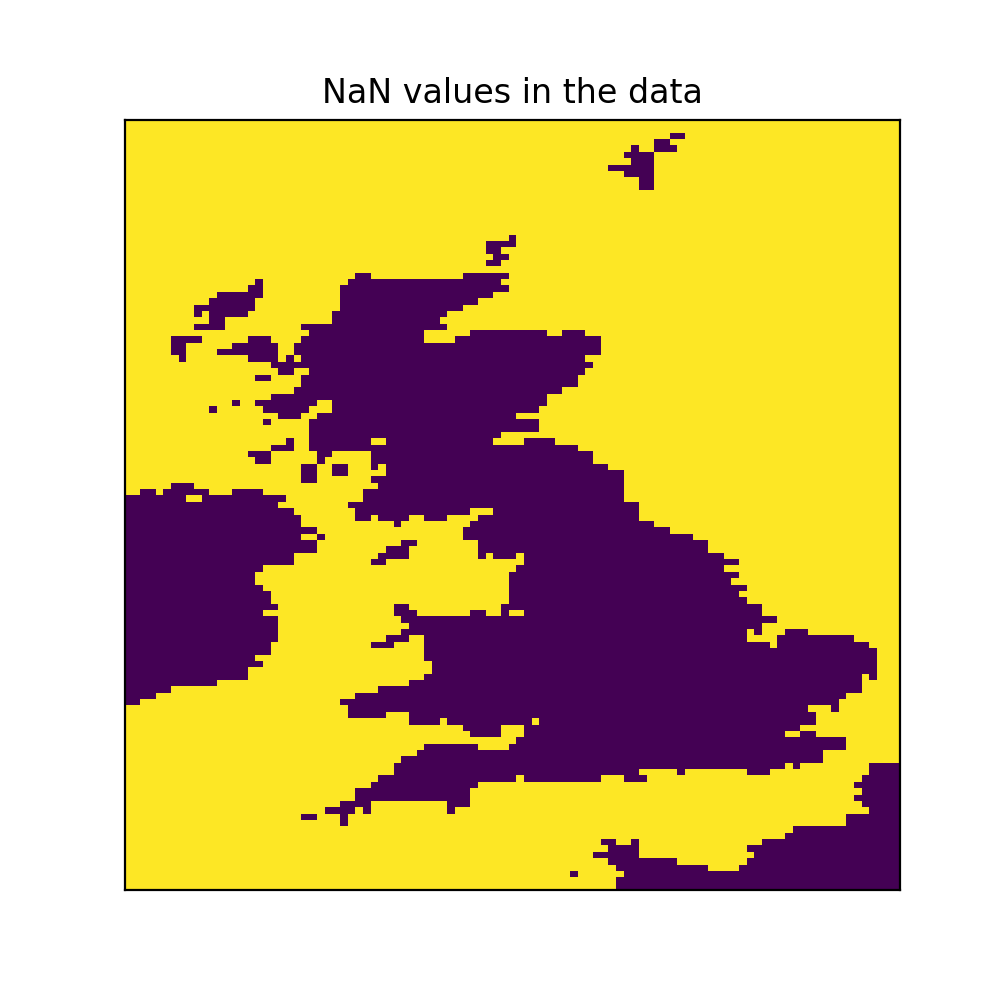

In [16]:
temperature_data = data['d2m']

plt.figure(figsize=(5, 5))
ax = temperature_data.isnull().sum(dim='valid_time').plot(add_colorbar=False)
plt.title('NaN values in the data')
plt.xlabel('')
plt.ylabel('')
plt.xticks([])
plt.yticks([])
plt.show()

Now downloaded a file with multiple variables (temperatures, soil, percipitation, surface pressure, wind strength (u and v components)) across multiple years (1950 to 2025)

In [19]:
data = xr.open_dataset(r"/Users/anvijoy/Desktop/Anvi/Uni Notes/Internal Placement/data_stream-moda-2.nc")

In [20]:
# Prints all the variables listed in the .nc file
print(data.data_vars)

Data variables:
    d2m      (valid_time, latitude, longitude) float32 45MB ...
    t2m      (valid_time, latitude, longitude) float32 45MB ...
    skt      (valid_time, latitude, longitude) float32 45MB ...
    stl1     (valid_time, latitude, longitude) float32 45MB ...
    stl2     (valid_time, latitude, longitude) float32 45MB ...
    stl3     (valid_time, latitude, longitude) float32 45MB ...
    stl4     (valid_time, latitude, longitude) float32 45MB ...
    src      (valid_time, latitude, longitude) float32 45MB ...
    swvl1    (valid_time, latitude, longitude) float32 45MB ...
    swvl2    (valid_time, latitude, longitude) float32 45MB ...
    swvl3    (valid_time, latitude, longitude) float32 45MB ...
    swvl4    (valid_time, latitude, longitude) float32 45MB ...
    u10      (valid_time, latitude, longitude) float32 45MB ...
    v10      (valid_time, latitude, longitude) float32 45MB ...
    sp       (valid_time, latitude, longitude) float32 45MB ...
    tp       (valid_time

In [21]:
# Prints all the dimensions listed in the .nc file
print(data.dims)

FrozenMappingWarningOnValuesAccess({'valid_time': 905, 'latitude': 121, 'longitude': 103})


In [22]:
# Prints all the attributes listed in the .nc file
print(data.attrs)

{'GRIB_centre': 'ecmf', 'GRIB_centreDescription': 'European Centre for Medium-Range Weather Forecasts', 'GRIB_subCentre': 0, 'Conventions': 'CF-1.7', 'institution': 'European Centre for Medium-Range Weather Forecasts', 'history': '2025-06-30T19:25 GRIB to CDM+CF via cfgrib-0.9.15.0/ecCodes-2.41.0 with {"source": "data.grib", "filter_by_keys": {"stream": ["moda"]}, "encode_cf": ["parameter", "time", "geography", "vertical"]}'}


In [23]:
# Prints the data of the variable
print(data.d2m)

<xarray.DataArray 'd2m' (valid_time: 905, latitude: 121, longitude: 103)> Size: 45MB
[11279015 values with dtype=float32]
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 7kB 1950-01-01 ... 2025-05-01
  * latitude    (latitude) float64 968B 61.0 60.9 60.8 60.7 ... 49.2 49.1 49.0
  * longitude   (longitude) float64 824B -8.2 -8.1 -8.0 -7.9 ... 1.7 1.8 1.9 2.0
    expver      (valid_time) <U4 14kB ...
Attributes: (12/31)
    GRIB_paramId:                             168
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      12463
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_gridType:                            regular_ll
    ...                                       ...
    GRIB_totalNumber:                         0
    GRIB_units:                               K
    long_name:                                2 metre dewpoint temperature
    units

In [24]:
# Variables can be converted to numpy arrays
data_one_year = data.d2m.values
data_all_months = data.d2m.values

# Print the shape of the numpy array
print(data_one_year.shape)
print(data_all_months.shape)

(905, 121, 103)
(905, 121, 103)


In [25]:
print(data_one_year)

[[[      nan       nan       nan ...       nan       nan       nan]
  [      nan       nan       nan ...       nan       nan       nan]
  [      nan       nan       nan ...       nan       nan       nan]
  ...
  [      nan       nan       nan ... 272.18994 272.1333  272.07275]
  [      nan       nan       nan ... 272.27588 272.23096 272.1958 ]
  [      nan       nan       nan ... 272.34033 272.30908 272.2915 ]]

 [[      nan       nan       nan ...       nan       nan       nan]
  [      nan       nan       nan ...       nan       nan       nan]
  [      nan       nan       nan ...       nan       nan       nan]
  ...
  [      nan       nan       nan ... 276.20435 276.14185 276.07153]
  [      nan       nan       nan ... 276.29028 276.27075 276.26685]
  [      nan       nan       nan ... 276.39966 276.40942 276.4524 ]]

 [[      nan       nan       nan ...       nan       nan       nan]
  [      nan       nan       nan ...       nan       nan       nan]
  [      nan       nan       nan

<IPython.core.display.Javascript object>


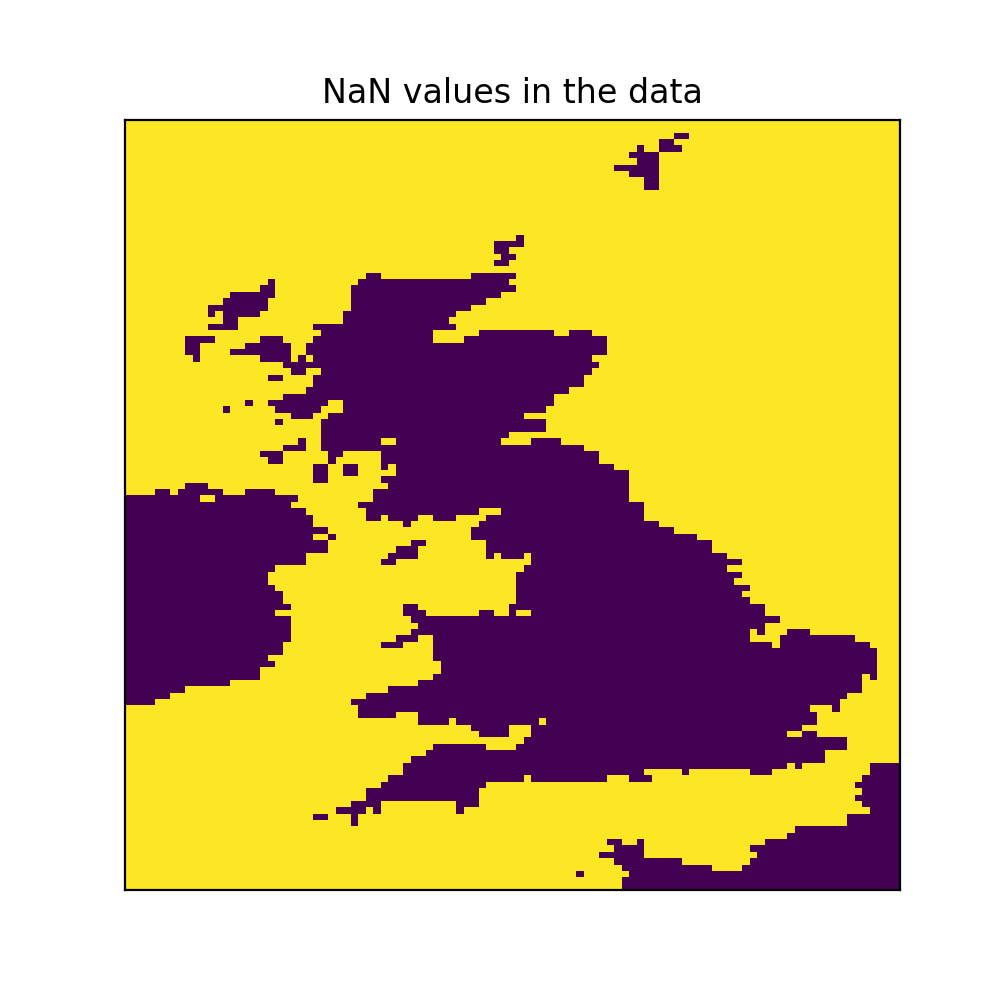

In [26]:
temperature_data = data['d2m']

plt.figure(figsize=(5, 5))
ax = temperature_data.isnull().sum(dim='valid_time').plot(add_colorbar=False)
plt.title('NaN values in the data')
plt.xlabel('')
plt.ylabel('')
plt.xticks([])
plt.yticks([])
plt.show()

<IPython.core.display.Javascript object>


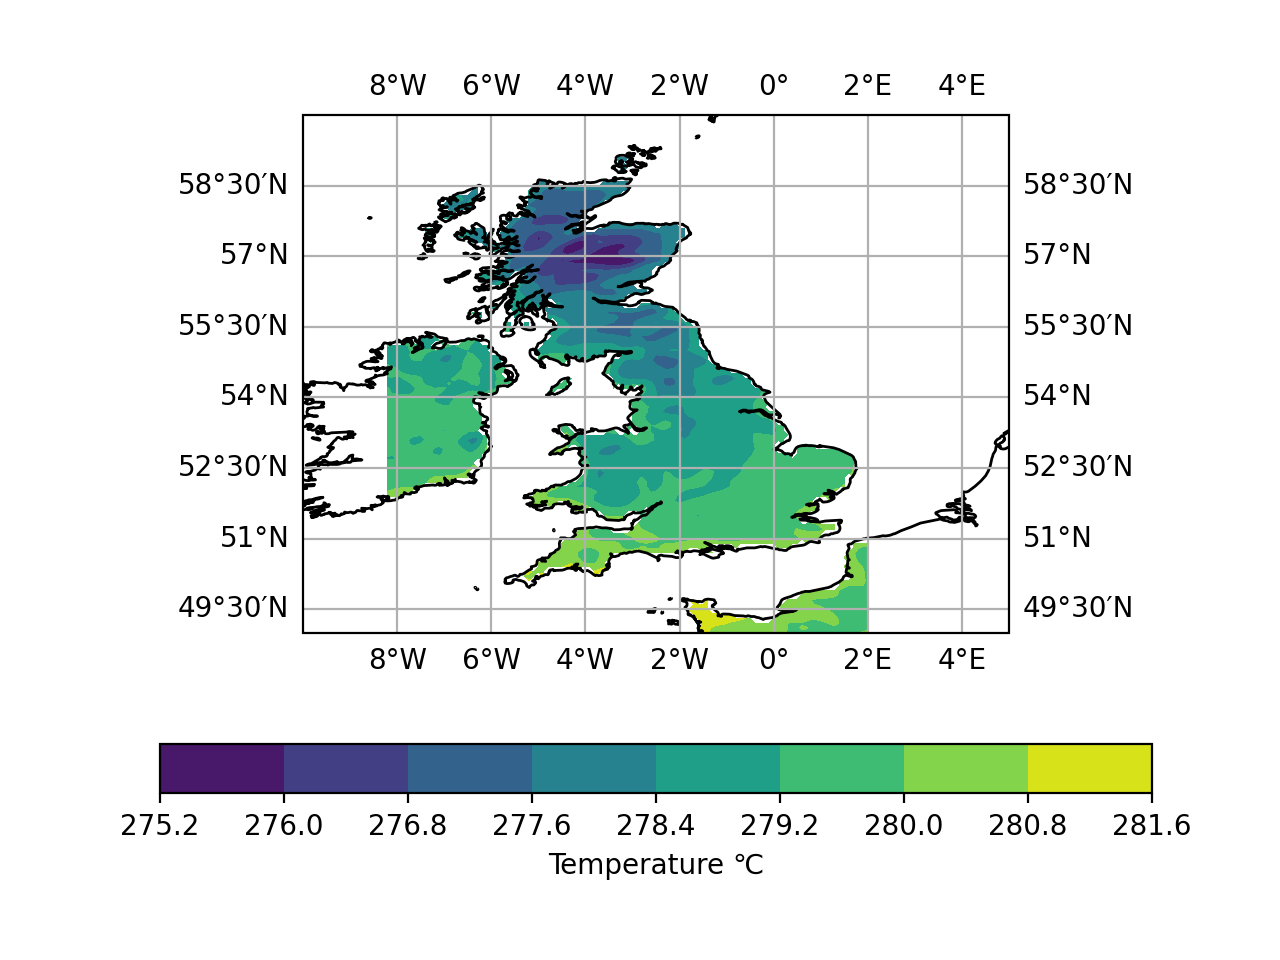

In [27]:
import cartopy.crs as ccrs


lons = data.variables['longitude'][:]
lats = data.variables['latitude'][:]


mean_temp = np.mean(data_all_months, axis=0)

plt.figure()


ax = plt.axes(projection=ccrs.PlateCarree())


ax.set_extent([-10, 5, 49, 60])


ax.coastlines(resolution='10m', color='black')
ax.gridlines(draw_labels=True, dms=True)


contour = plt.contourf(lons, lats, mean_temp, cmap=plt.cm.viridis)


cbar = plt.colorbar(contour, orientation='horizontal')
cbar.set_label(u"Temperature \u2103")

plt.show()